Đã tìm thấy đường đi!
Độ dài đường đi: 86
Thời gian thực thi: 0.3697 giây


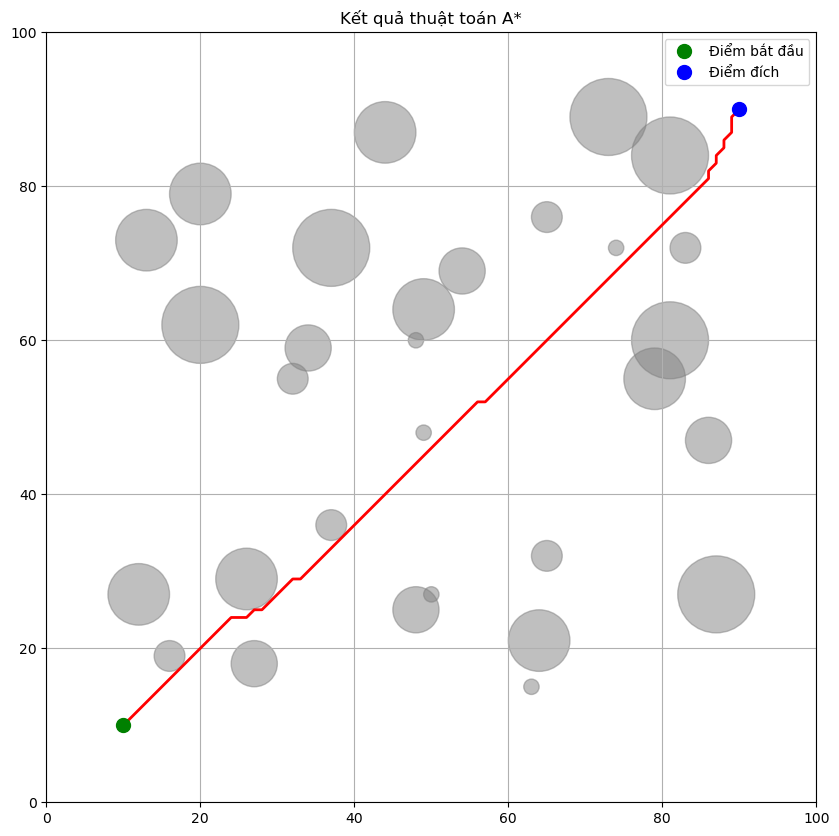

In [2]:
import heapq
import math
import random
import time
import matplotlib.pyplot as plt

def create_obstacle(x, y, radius):
    return {"x": x, "y": y, "radius": radius}

def heuristic(a, goal):
    return math.sqrt((goal[0] - a[0]) ** 2 + (goal[1] - a[1]) ** 2)

def distance(a, b):
    return math.sqrt((b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2)

def is_collision(point, obstacle):
    return distance((obstacle["x"], obstacle["y"]), point) <= obstacle["radius"]

def get_neighbors(current, obstacles, max_coord=100):
    neighbors = []
    for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]:
        x, y = current[0] + dx, current[1] + dy
        if 0 <= x < max_coord and 0 <= y < max_coord:
            if not any(is_collision((x, y), obs) for obs in obstacles):
                neighbors.append((x, y))
    return neighbors

def reconstruct_path(came_from, current):
    total_path = [current]
    while current in came_from:
        current = came_from[current]
        total_path.insert(0, current)
    return total_path

def a_star(start, goal, obstacles):
    open_set = [(0, start)]
    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    while open_set:
        current = heapq.heappop(open_set)[1]

        if current == goal:
            return reconstruct_path(came_from, current)

        for neighbor in get_neighbors(current, obstacles):
            tentative_g_score = g_score[current] + distance(current, neighbor)

            if tentative_g_score < g_score.get(neighbor, float('inf')):
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = g_score[neighbor] + heuristic(neighbor, goal)
                heapq.heappush(open_set, (f_score[neighbor], neighbor))

    return None  # Không tìm thấy đường đi

def plot_result(obstacles, path, start, goal):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    ax.set_aspect('equal')

    # Vẽ các chướng ngại vật
    for obstacle in obstacles:
        circle = plt.Circle((obstacle["x"], obstacle["y"]), obstacle["radius"],
                            fill=True, color='gray', alpha=0.5)
        ax.add_artist(circle)

    # Vẽ đường đi
    if path:
        path_x, path_y = zip(*path)
        ax.plot(path_x, path_y, 'r-', linewidth=2)

    # Vẽ điểm bắt đầu và điểm đích
    ax.plot(start[0], start[1], 'go', markersize=10, label='Điểm bắt đầu')
    ax.plot(goal[0], goal[1], 'bo', markersize=10, label='Điểm đích')

    ax.legend()
    ax.set_title('Kết quả thuật toán A*')
    plt.grid(True)

    # Lưu ảnh
    plt.savefig('pic1.png', dpi=300, bbox_inches='tight')
    
    plt.show()

def main():
    # Thiết lập môi trường và các tham số
    obstacles = [create_obstacle(random.randint(11, 89), random.randint(11, 89), random.choice([1, 2, 3, 4, 5])) for _ in range(30)]
    start = (10, 10)
    goal = (90, 90)

    # Bắt đầu đo thời gian
    start_time = time.time()

    # Chạy thuật toán A*
    path = a_star(start, goal, obstacles)

    # Kết thúc đo thời gian
    end_time = time.time()
    execution_time = end_time - start_time

    # In kết quả
    if path:
        print("Đã tìm thấy đường đi!")
        print(f"Độ dài đường đi: {len(path)}")
    else:
        print("Không tìm thấy đường đi.")

    print(f"Thời gian thực thi: {execution_time:.4f} giây")
    
    # Vẽ kết quả
    plot_result(obstacles, path, start, goal)

if __name__ == "__main__":
    main()

Đã tìm thấy đường đi!
Độ dài đường đi: 52
Thời gian thực thi: 0.0035 giây


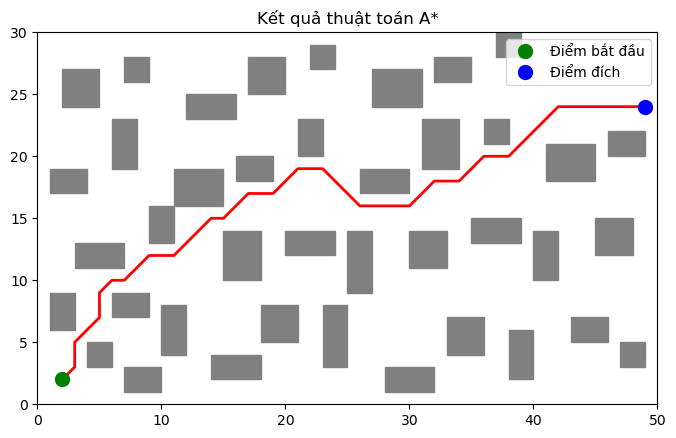

In [1]:
import heapq
import math
import time
import numpy as np
import matplotlib.pyplot as plt

# Thiết lập các thông số môi trường
WIDTH = 50
HEIGHT = 30
START = (2, 2)
GOAL = (49, 24)

# Tạo danh sách các vật cản
def create_obstacles():
    obstacles = []
    # Thêm vật cản hình chữ nhật
    rectangles = [
        ((4, 3), 2, 2),
        ((7, 1), 3, 2),
        ((1, 6), 2, 3),
        ((6, 7), 3, 2),
        ((10, 4), 2, 4),
        ((14, 2), 4, 2),
        ((18, 5), 3, 3),
        ((23, 3), 2, 5),
        ((28, 1), 4, 2),
        ((33, 4), 3, 3),
        ((38, 2), 2, 4),
        ((43, 5), 3, 2),
        ((47, 3), 2, 2),
        ((3, 11), 4, 2),
        ((9, 13), 2, 3),
        ((15, 10), 3, 4),
        ((20, 12), 4, 2),
        ((25, 9), 2, 5),
        ((30, 11), 3, 3),
        ((35, 13), 4, 2),
        ((40, 10), 2, 4),
        ((45, 12), 3, 3),
        ((1, 17), 3, 2),
        ((6, 19), 2, 4),
        ((11, 16), 4, 3),
        ((16, 18), 3, 2),
        ((21, 20), 2, 3),
        ((26, 17), 4, 2),
        ((31, 19), 3, 4),
        ((36, 21), 2, 2),
        ((41, 18), 4, 3),
        ((46, 20), 3, 2),
        ((2, 24), 3, 3),
        ((7, 26), 2, 2),
        ((12, 23), 4, 2),
        ((17, 25), 3, 3),
        ((22, 27), 2, 2),
        ((27, 24), 4, 3),
        ((32, 26), 3, 2),
        ((37, 28), 2, 2)
    ]
    for rect in rectangles:
        obstacles.append(('rectangle', rect[0], rect[1], rect[2]))
    return obstacles

# Kiểm tra va chạm
def is_collision(point, obstacles):
    x, y = point
    if x < 0 or x >= WIDTH or y < 0 or y >= HEIGHT:
        return True
    for obs in obstacles:
        if obs[0] == 'rectangle':
            if (obs[1][0] <= x <= obs[1][0] + obs[2] and
                obs[1][1] <= y <= obs[1][1] + obs[3]):
                return True
    return False

def heuristic(a, goal):
    return math.sqrt((goal[0] - a[0]) ** 2 + (goal[1] - a[1]) ** 2)

def get_neighbors(current, obstacles):
    neighbors = []
    for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]:
        x, y = current[0] + dx, current[1] + dy
        if 0 <= x < WIDTH and 0 <= y < HEIGHT and not is_collision((x, y), obstacles):
            neighbors.append((x, y))
    return neighbors

def a_star(start, goal, obstacles):
    open_set = []
    heapq.heappush(open_set, (0, start))
    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    while open_set:
        current = heapq.heappop(open_set)[1]

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1]

        for neighbor in get_neighbors(current, obstacles):
            tentative_g_score = g_score[current] + 1  # Assuming each step costs 1

            if tentative_g_score < g_score.get(neighbor, float('inf')):
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = g_score[neighbor] + heuristic(neighbor, goal)
                if neighbor not in [i[1] for i in open_set]:
                    heapq.heappush(open_set, (f_score[neighbor], neighbor))

    return None  # Không tìm thấy đường đi

def plot_result(obstacles, path, start, goal):
    fig, ax = plt.subplots(figsize=(8,12))
    ax.set_xlim(0, WIDTH)
    ax.set_ylim(0, HEIGHT)
    ax.set_aspect('equal')

    # Vẽ các chướng ngại vật
    for obs in obstacles:
        if obs[0] == 'rectangle':
            rect = plt.Rectangle(obs[1], obs[2], obs[3], fill=True, color='gray')
            ax.add_patch(rect)

    # Vẽ đường đi
    if path:
        path_x, path_y = zip(*path)
        ax.plot(path_x, path_y, 'r-', linewidth=2)

    # Vẽ điểm bắt đầu và điểm đích
    ax.plot(start[0], start[1], 'go', markersize=10, label='Điểm bắt đầu')
    ax.plot(goal[0], goal[1], 'bo', markersize=10, label='Điểm đích')

    ax.legend()
    ax.set_title('Kết quả thuật toán A*')
    
    # Lưu ảnh
    plt.savefig('pic3-1.png', dpi=300, bbox_inches='tight')
    
    plt.show()

def main():
    # Thiết lập môi trường và các tham số
    obstacles = create_obstacles()
    start = START
    goal = GOAL

    # Bắt đầu đo thời gian
    start_time = time.time()

    # Chạy thuật toán A*
    path = a_star(start, goal, obstacles)

    # Kết thúc đo thời gian
    end_time = time.time()
    execution_time = end_time - start_time

    # In kết quả
    if path:
        print("Đã tìm thấy đường đi!")
        print(f"Độ dài đường đi: {len(path)}")
    else:
        print("Không tìm thấy đường đi.")

    print(f"Thời gian thực thi: {execution_time:.4f} giây")

    # Vẽ kết quả
    plot_result(obstacles, path, start, goal)

if __name__ == "__main__":
    main()

Đã tìm thấy đường đi!
Độ dài đường đi: 52
Thời gian thực thi: 0.0143 giây


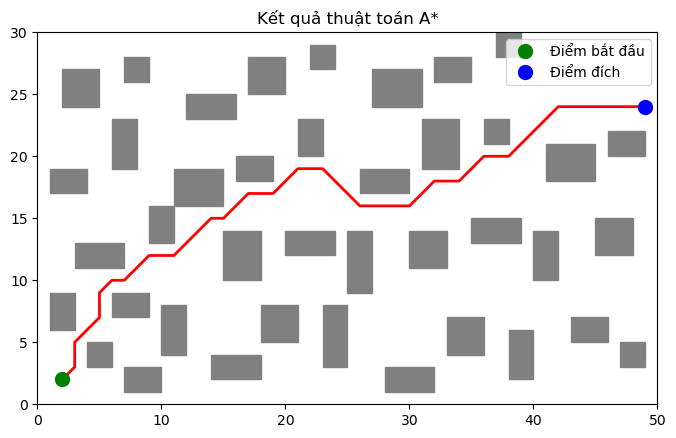

In [3]:
import heapq
import math
import time
import numpy as np
import matplotlib.pyplot as plt

# Thiết lập các thông số môi trường
WIDTH = 50
HEIGHT = 30
START = (2, 2)
GOAL = (49, 24)

# Tạo danh sách các vật cản
def create_obstacles():
    obstacles = []
    # Thêm vật cản hình chữ nhật
    rectangles = [
        ((4, 3), 2, 2),
        ((7, 1), 3, 2),
        ((1, 6), 2, 3),
        ((6, 7), 3, 2),
        ((10, 4), 2, 4),
        ((14, 2), 4, 2),
        ((18, 5), 3, 3),
        ((23, 3), 2, 5),
        ((28, 1), 4, 2),
        ((33, 4), 3, 3),
        ((38, 2), 2, 4),
        ((43, 5), 3, 2),
        ((47, 3), 2, 2),
        ((3, 11), 4, 2),
        ((9, 13), 2, 3),
        ((15, 10), 3, 4),
        ((20, 12), 4, 2),
        ((25, 9), 2, 5),
        ((30, 11), 3, 3),
        ((35, 13), 4, 2),
        ((40, 10), 2, 4),
        ((45, 12), 3, 3),
        ((1, 17), 3, 2),
        ((6, 19), 2, 4),
        ((11, 16), 4, 3),
        ((16, 18), 3, 2),
        ((21, 20), 2, 3),
        ((26, 17), 4, 2),
        ((31, 19), 3, 4),
        ((36, 21), 2, 2),
        ((41, 18), 4, 3),
        ((46, 20), 3, 2),
        ((2, 24), 3, 3),
        ((7, 26), 2, 2),
        ((12, 23), 4, 2),
        ((17, 25), 3, 3),
        ((22, 27), 2, 2),
        ((27, 24), 4, 3),
        ((32, 26), 3, 2),
        ((37, 28), 2, 2)
    ]
    for rect in rectangles:
        obstacles.append(('rectangle', rect[0], rect[1], rect[2]))
    return obstacles

# Kiểm tra va chạm
def is_collision(point, obstacles):
    x, y = point
    if x < 0 or x >= WIDTH or y < 0 or y >= HEIGHT:
        return True
    for obs in obstacles:
        if obs[0] == 'rectangle':
            if (obs[1][0] <= x <= obs[1][0] + obs[2] and
                obs[1][1] <= y <= obs[1][1] + obs[3]):
                return True
    return False

def heuristic(a, goal):
    return math.sqrt((goal[0] - a[0]) ** 2 + (goal[1] - a[1]) ** 2)

def get_neighbors(current, obstacles):
    neighbors = []
    for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]:
        x, y = current[0] + dx, current[1] + dy
        if 0 <= x < WIDTH and 0 <= y < HEIGHT and not is_collision((x, y), obstacles):
            neighbors.append((x, y))
    return neighbors

def a_star(start, goal, obstacles):
    open_set = []
    heapq.heappush(open_set, (0, start))
    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    while open_set:
        current = heapq.heappop(open_set)[1]

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1]

        for neighbor in get_neighbors(current, obstacles):
            tentative_g_score = g_score[current] + 1  # Assuming each step costs 1

            if tentative_g_score < g_score.get(neighbor, float('inf')):
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = g_score[neighbor] + heuristic(neighbor, goal)
                if neighbor not in [i[1] for i in open_set]:
                    heapq.heappush(open_set, (f_score[neighbor], neighbor))

    return None  # Không tìm thấy đường đi

def plot_result(obstacles, path, start, goal):
    fig, ax = plt.subplots(figsize=(8,12))
    ax.set_xlim(0, WIDTH)
    ax.set_ylim(0, HEIGHT)
    ax.set_aspect('equal')

    # Vẽ các chướng ngại vật
    for obs in obstacles:
        if obs[0] == 'rectangle':
            rect = plt.Rectangle(obs[1], obs[2], obs[3], fill=True, color='gray')
            ax.add_patch(rect)

    # Vẽ đường đi
    if path:
        path_x, path_y = zip(*path)
        ax.plot(path_x, path_y, 'r-', linewidth=2)

    # Vẽ điểm bắt đầu và điểm đích
    ax.plot(start[0], start[1], 'go', markersize=10, label='Điểm bắt đầu')
    ax.plot(goal[0], goal[1], 'bo', markersize=10, label='Điểm đích')

    ax.legend()
    ax.set_title('Kết quả thuật toán A*')

    plt.show()

def main():
    # Thiết lập môi trường và các tham số
    obstacles = create_obstacles()
    start = START
    goal = GOAL

    # Bắt đầu đo thời gian
    start_time = time.time()

    # Chạy thuật toán A*
    path = a_star(start, goal, obstacles)

    # Kết thúc đo thời gian
    end_time = time.time()
    execution_time = end_time - start_time

    # In kết quả
    if path:
        print("Đã tìm thấy đường đi!")
        print(f"Độ dài đường đi: {len(path)}")
    else:
        print("Không tìm thấy đường đi.")

    print(f"Thời gian thực thi: {execution_time:.4f} giây")

    # Vẽ kết quả
    plot_result(obstacles, path, start, goal)

if __name__ == "__main__":
    main()

Số lần chạy: 1000
Tổng thời gian chạy: 5.290538600005675 giây
Thời gian trung bình: 0.005286 giây
Độ lệch chuẩn: 0.000265 giây
Thời gian ngắn nhất: 0.004682 giây
Thời gian dài nhất: 0.006571 giây
Đã tìm thấy đường đi trong tất cả các lần chạy!
Độ dài đường đi trung bình: 52.00


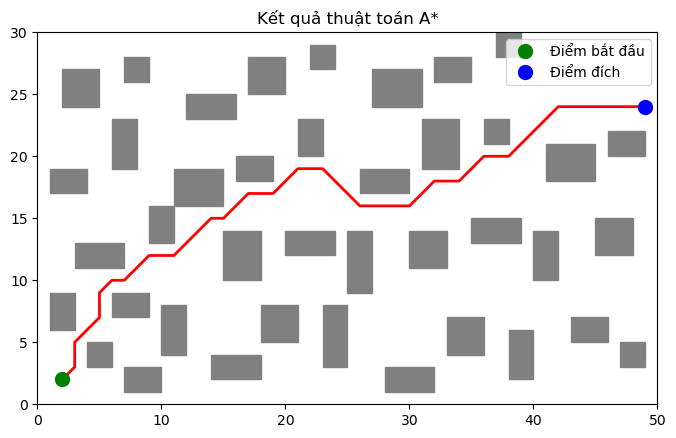

In [7]:
import heapq
import math
import time
import numpy as np
import matplotlib.pyplot as plt
import statistics

# Thiết lập các thông số môi trường
WIDTH = 50
HEIGHT = 30
START = (2, 2)
GOAL = (49, 24)

# Tạo danh sách các vật cản
def create_obstacles():
    obstacles = []
    # Thêm vật cản hình chữ nhật
    rectangles = [
        ((4, 3), 2, 2),
        ((7, 1), 3, 2),
        ((1, 6), 2, 3),
        ((6, 7), 3, 2),
        ((10, 4), 2, 4),
        ((14, 2), 4, 2),
        ((18, 5), 3, 3),
        ((23, 3), 2, 5),
        ((28, 1), 4, 2),
        ((33, 4), 3, 3),
        ((38, 2), 2, 4),
        ((43, 5), 3, 2),
        ((47, 3), 2, 2),
        ((3, 11), 4, 2),
        ((9, 13), 2, 3),
        ((15, 10), 3, 4),
        ((20, 12), 4, 2),
        ((25, 9), 2, 5),
        ((30, 11), 3, 3),
        ((35, 13), 4, 2),
        ((40, 10), 2, 4),
        ((45, 12), 3, 3),
        ((1, 17), 3, 2),
        ((6, 19), 2, 4),
        ((11, 16), 4, 3),
        ((16, 18), 3, 2),
        ((21, 20), 2, 3),
        ((26, 17), 4, 2),
        ((31, 19), 3, 4),
        ((36, 21), 2, 2),
        ((41, 18), 4, 3),
        ((46, 20), 3, 2),
        ((2, 24), 3, 3),
        ((7, 26), 2, 2),
        ((12, 23), 4, 2),
        ((17, 25), 3, 3),
        ((22, 27), 2, 2),
        ((27, 24), 4, 3),
        ((32, 26), 3, 2),
        ((37, 28), 2, 2)
    ]
    for rect in rectangles:
        obstacles.append(('rectangle', rect[0], rect[1], rect[2]))
    return obstacles

# Kiểm tra va chạm
def is_collision(point, obstacles):
    x, y = point
    if x < 0 or x >= WIDTH or y < 0 or y >= HEIGHT:
        return True
    for obs in obstacles:
        if obs[0] == 'rectangle':
            if (obs[1][0] <= x <= obs[1][0] + obs[2] and
                obs[1][1] <= y <= obs[1][1] + obs[3]):
                return True
    return False

def heuristic(a, goal):
    return math.sqrt((goal[0] - a[0]) ** 2 + (goal[1] - a[1]) ** 2)

def get_neighbors(current, obstacles):
    neighbors = []
    for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]:
        x, y = current[0] + dx, current[1] + dy
        if 0 <= x < WIDTH and 0 <= y < HEIGHT and not is_collision((x, y), obstacles):
            neighbors.append((x, y))
    return neighbors

def a_star(start, goal, obstacles):
    open_set = []
    heapq.heappush(open_set, (0, start))
    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    while open_set:
        current = heapq.heappop(open_set)[1]

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1]

        for neighbor in get_neighbors(current, obstacles):
            tentative_g_score = g_score[current] + 1  # Assuming each step costs 1

            if tentative_g_score < g_score.get(neighbor, float('inf')):
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = g_score[neighbor] + heuristic(neighbor, goal)
                if neighbor not in [i[1] for i in open_set]:
                    heapq.heappush(open_set, (f_score[neighbor], neighbor))

    return None  # Không tìm thấy đường đi

def plot_result(obstacles, path, start, goal):
    fig, ax = plt.subplots(figsize=(8,12))
    ax.set_xlim(0, WIDTH)
    ax.set_ylim(0, HEIGHT)
    ax.set_aspect('equal')

    # Vẽ các chướng ngại vật
    for obs in obstacles:
        if obs[0] == 'rectangle':
            rect = plt.Rectangle(obs[1], obs[2], obs[3], fill=True, color='gray')
            ax.add_patch(rect)

    # Vẽ đường đi
    if path:
        path_x, path_y = zip(*path)
        ax.plot(path_x, path_y, 'r-', linewidth=2)

    # Vẽ điểm bắt đầu và điểm đích
    ax.plot(start[0], start[1], 'go', markersize=10, label='Điểm bắt đầu')
    ax.plot(goal[0], goal[1], 'bo', markersize=10, label='Điểm đích')

    ax.legend()
    ax.set_title('Kết quả thuật toán A*')

    # Lưu ảnh
    plt.savefig('pic4-1.png', dpi=300, bbox_inches='tight')
    
    plt.show()

def run_single_iteration(obstacles, start, goal):
    start_time = time.perf_counter()
    path = a_star(start, goal, obstacles)
    end_time = time.perf_counter()
    execution_time = end_time - start_time
    return path, execution_time

def main():
    # Thiết lập môi trường và các tham số
    obstacles = create_obstacles()
    start = START
    goal = GOAL
    total_start = time.perf_counter()
    iterations = 1000
    execution_times = []
    paths = []

    for _ in range(iterations):
        path, execution_time = run_single_iteration(obstacles, start, goal)
        execution_times.append(execution_time)
        paths.append(path)
    
    # Tính toán và in kết quả
    avg_time = statistics.mean(execution_times)
    std_dev_time = statistics.stdev(execution_times)
    min_time = min(execution_times)
    max_time = max(execution_times)
    total_end = time.perf_counter()
    total_time = total_end - total_start
    
    print(f"Số lần chạy: {iterations}")
    print(f"Tổng thời gian chạy: {total_time} giây")
    print(f"Thời gian trung bình: {avg_time:.6f} giây")
    print(f"Độ lệch chuẩn: {std_dev_time:.6f} giây")
    print(f"Thời gian ngắn nhất: {min_time:.6f} giây")
    print(f"Thời gian dài nhất: {max_time:.6f} giây")
    
    # Kiểm tra kết quả đường đi
    if all(paths):
        print("Đã tìm thấy đường đi trong tất cả các lần chạy!")
        print(f"Độ dài đường đi trung bình: {statistics.mean([len(p) for p in paths]):.2f}")
    else:
        print("Có ít nhất một lần chạy không tìm thấy đường đi.")
    
    # Vẽ kết quả cho lần chạy đầu tiên
    plot_result(obstacles, paths[0], start, goal)

if __name__ == "__main__":
    main()

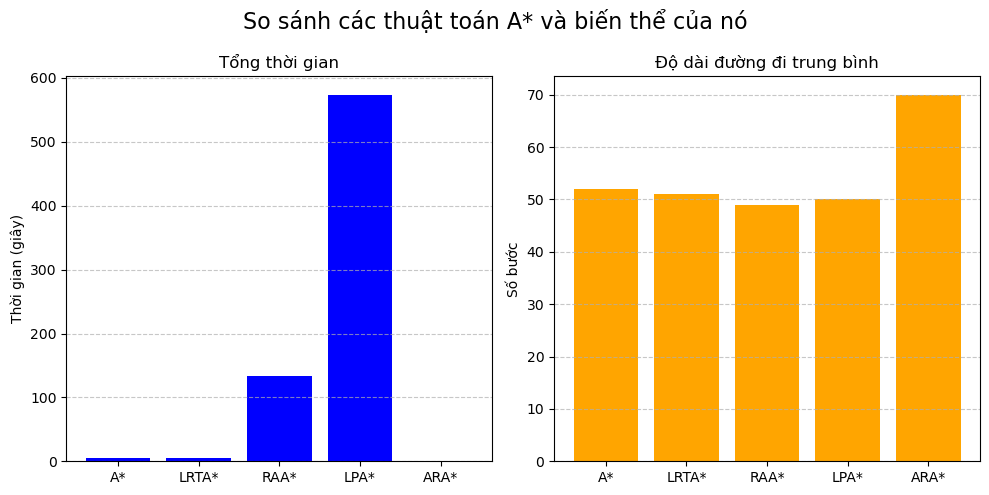

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Dữ liệu
algorithms = ['A*', 'LRTA*', 'RAA*', 'LPA*', 'ARA*']
total_time = [5.29053, 4.5077, 133.6934, 573.8235, 0.6900]
avg_time = [0.005286, 0.004507, 0.133693, 0.573823, 0.000689]
std_dev_time = [0.001188, 0.002062, 0.012634, 0.043622, 0.000524]
path_length = [52, 51, 49, 50, 70]

# Thiết lập vị trí cho các biểu đồ
x = np.arange(len(algorithms))

# Tạo hình và trục
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('So sánh các thuật toán A* và biến thể của nó', fontsize=16)

# Biểu đồ tổng thời gian
axs[0].bar(x, total_time, color='b')
axs[0].set_title('Tổng thời gian')
axs[0].set_xticks(x)
axs[0].set_xticklabels(algorithms)
axs[0].set_ylabel('Thời gian (giây)')

# Biểu đồ độ dài đường đi trung bình
axs[1].bar(x, path_length, color='orange')
axs[1].set_title('Độ dài đường đi trung bình')
axs[1].set_xticks(x)
axs[1].set_xticklabels(algorithms)
axs[1].set_ylabel('Số bước')

# Thêm lưới cho dễ đọc
for ax in axs.flatten():
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
# Tinh chỉnh bố cục
plt.savefig('pic4-77.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()